# Project 4: Hackathon

## *Template Notebook*

In this notebook:

* [Topic 1](#topic-1)
* [Topic 2](#topic-2)

#### Import Libraries & Read in Data

In [2]:
## standard imports 
import pandas as pd 
import numpy as np
import re
## visualizations
import matplotlib.pyplot as plt
import seaborn as sns
## preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.dummy import DummyClassifier
## modeling
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import MultinomialNB
## trees
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, AdaBoostClassifier, GradientBoostingRegressor
## NLP
from sklearn.feature_extraction.text import CountVectorizer
## analysis
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, make_scorer, f1_score, mean_squared_error

## options
import sklearn
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 100
pd.set_option('max_colwidth', 100)

In [5]:
### read in data
data = pd.read_csv('../data/country.csv')
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Country,Cam,My Mistake,5ICoYTFfmUKguBHpINKkGL,45,0.00821,0.551,200013,0.704,0.000002,0.2450,-5.426,0.0444,97.075,0.541
1,Country,Kevin Fowler,That Girl,0rk6JE7ODyGWWquK4y7t1u,42,0.02720,0.375,208187,0.859,0.000000,0.2670,-3.243,0.0569,74.059,0.597
2,Country,Roger Miller,Chug-A-Lug,3vMwtAfDNM8dDBWMvS78pn,46,0.69000,0.699,123360,0.408,0.000219,0.1450,-11.460,0.0960,171.922,0.842
3,Country,M. Ward,Chinese Translation,7IJlk42gDKt5dfSSLwtEsp,54,0.15200,0.555,238600,0.726,0.000178,0.1480,-8.939,0.0368,107.719,0.505
4,Country,Chris Cagle,Anywhere But Here,2JxSaSRavL82FCTCPzVmEf,42,0.57100,0.640,243000,0.478,0.000000,0.0902,-6.960,0.0330,136.717,0.315


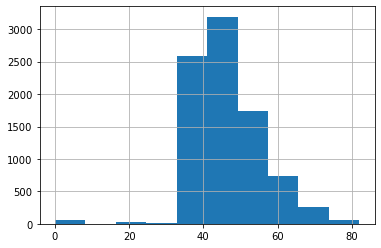

In [15]:
data['popularity'].hist()

In [20]:
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,8664.000000,8664.000000,8664.000000,8664.000000,8664.000000,8664.000000,8664.000000,8664.000000,8664.000000,8664.000000,8664.000000
mean,46.100416,0.270172,0.577038,217237.527008,0.636318,0.005610,0.187216,-7.341693,0.048989,123.414419,0.535160
std,9.745975,0.262801,0.109771,46500.458530,0.200344,0.041811,0.153139,3.250495,0.048392,30.237831,0.219819
min,0.000000,0.000028,0.192000,41773.000000,0.018800,0.000000,0.014300,-27.119000,0.022300,48.718000,0.039500
25%,39.000000,0.048000,0.509000,188387.000000,0.493000,0.000000,0.098775,-8.943000,0.029600,98.045750,0.358000
50%,45.000000,0.177000,0.580000,211473.500000,0.668000,0.000001,0.128000,-6.509000,0.034800,122.904500,0.530000
75%,52.000000,0.438000,0.649000,237910.250000,0.800000,0.000044,0.230000,-5.019000,0.045900,144.480750,0.710000
max,82.000000,0.985000,0.964000,826813.000000,0.991000,0.880000,0.994000,-0.521000,0.689000,217.538000,0.985000


In [27]:
data['is_popular'] = np.where(data['popularity'] >= data['popularity'].median(), 1, 0) 

In [28]:
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,is_popular
0,Country,Cam,My Mistake,5ICoYTFfmUKguBHpINKkGL,45,0.00821,0.551,200013,0.704,0.000002,0.2450,-5.426,0.0444,97.075,0.541,1
1,Country,Kevin Fowler,That Girl,0rk6JE7ODyGWWquK4y7t1u,42,0.02720,0.375,208187,0.859,0.000000,0.2670,-3.243,0.0569,74.059,0.597,0
2,Country,Roger Miller,Chug-A-Lug,3vMwtAfDNM8dDBWMvS78pn,46,0.69000,0.699,123360,0.408,0.000219,0.1450,-11.460,0.0960,171.922,0.842,1
3,Country,M. Ward,Chinese Translation,7IJlk42gDKt5dfSSLwtEsp,54,0.15200,0.555,238600,0.726,0.000178,0.1480,-8.939,0.0368,107.719,0.505,1
4,Country,Chris Cagle,Anywhere But Here,2JxSaSRavL82FCTCPzVmEf,42,0.57100,0.640,243000,0.478,0.000000,0.0902,-6.960,0.0330,136.717,0.315,0


In [26]:
data['is_popular'].value_counts()

1    4365
0    4299
Name: is_popular, dtype: int64

In [9]:
### select data
X = data.drop(columns=['genre', 'artist_name', 'track_name', 'track_id', 'duration_ms', 'popularity', 'is_popular'])
y = data['popularity']
### TTS
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Linear Regression <a class="anchor" id="lr"></a>
<hr/>

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print('Training score: ', lr.score(X_train, y_train))
print('Testing score: ', lr.score(X_test, y_test))

Training score:  0.01183571390728344
Testing score:  0.013085475211439102


## Topic 2 <a class="anchor" id="topic-2"></a>
<hr/>

In [12]:
lgr = LogisticRegression(max_iter=1000)
lgr.fit(X_train, y_train)

print('Training score: ', lgr.score(X_train, y_train))
print('Testing score: ', lgr.score(X_test, y_test))

Training score:  0.06140350877192982
Testing score:  0.05771006463527239


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
pipe_lgr = make_pipeline(StandardScaler(), LogisticRegression())
params_lgr = {
#     'selectkbest__k': [10],
    'logisticregression__max_iter':[1000],
    'logisticregression__C': [0.01, 0.1, 1]
}

gs_lgr = GridSearchCV(pipe_lgr, params_lgr, n_jobs=-1)
gs_lgr.fit(X_train, y_train)

print('Training score: ', gs_lgr.score(X_train, y_train))
print('Testing score: ', gs_lgr.score(X_test, y_test))
print('Best Params', gs_lgr.best_params_)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Training score:  0.06355801785164666
Testing score:  0.04986149584487535
Best Params {'logisticregression__C': 0.01, 'logisticregression__max_iter': 1000}
